In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('../')
from NeuralNetwork.tools import save_to_db, groupby, make_valid_df
from NeuralNetwork.neural_network import NeuralNetwork

In [3]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_and_metrics.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetwork_5.

In [4]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [5]:
df = pd.DataFrame()

In [6]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [7]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [8]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [9]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [10]:
make_valid_df(df, fields)

In [12]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [46]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:48.200_Бондаренко Денис_2,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:43.700_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:36.500_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:01.151_Керов Андрей_4,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:07.969_Боим_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [47]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.696_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.060_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.878_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [48]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [49]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [50]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [51]:
make_valid_df(df_clear, fields)

In [52]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [53]:
df_clear = df_clear[fields]

In [54]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [55]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [56]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [57]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.060_Korsakov_1,0.95,0.00,0.03,0.05,0.01,0.00,0.01,-0.07,0.25
00:00:00.757_Боим_1,0.99,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.25
00:01:52.300_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.25
00:00:08.606_Korsakov_7,0.59,0.00,0.04,0.11,0.01,0.01,0.02,-0.13,0.47
00:00:05.000_Zaharova_6,0.87,0.03,0.00,0.01,0.11,0.00,0.00,0.02,0.38
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [58]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:47.300_Aleksashina_1,0.97,0.02,0.00,0.05,0.01,0.00,0.00,-0.03,0.32
00:00:59.000_Лебедев Андрей_1,0.95,0.01,0.02,0.04,0.01,0.00,0.00,-0.04,0.25
00:01:34.000_Турчина Екатерина_1,0.79,0.25,0.00,0.01,0.04,0.00,0.00,0.24,0.34
00:01:11.500_Бушунов Виктор_1,0.18,0.00,0.00,0.58,0.00,0.00,0.33,-0.86,0.61
00:00:00.500_Zaharova_3,0.96,0.01,0.00,0.01,0.03,0.00,0.00,-0.00,0.32
...,...,...,...,...,...,...,...,...,...
00:00:08.878_Fomin_5,0.81,0.05,0.01,0.01,0.01,0.00,0.00,0.04,0.28
00:00:07.636_Fomin_8,0.93,0.01,0.02,0.06,0.01,0.00,0.01,-0.07,0.28
00:00:06.303_Fomin_5,0.89,0.04,0.00,0.01,0.01,0.00,0.00,0.03,0.30


In [192]:
from keras.models import Model
from keras.layers import Input, Dense

In [193]:
models = []

In [194]:
a = Input(shape=(2,))
b = Dense(7)(a)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

In [195]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [196]:
nn.fit(df_train, epochs=15, batch_size=20)

Epoch 1/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0776
Epoch 2/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0344
Epoch 3/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0295
Epoch 4/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0280
Epoch 5/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0270
Epoch 6/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0260
Epoch 7/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0251
Epoch 8/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0244
Epoch 9/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0238
Epoch 10/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0233
Epoch 11/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0229
Epoch 12/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0226
Epoch 13/15
296/296 [====

In [197]:
models.append(('without_hidden_layer', 0, nn))

In [198]:
metrics = ['mean', 'norm', 'stat']

In [199]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [200]:
entry_dict = {'model': models[0][0], 'layer': 'first', 'N': 0}
entry_dict.update({metric: nn.model_metric(df_test, metric) for metric in metrics})
df_metrics = df_metrics.append(entry_dict, ignore_index = True)

In [201]:
# df_metrics.insert(2, 'N', ['0'] * len(df_metrics))

In [202]:
df_metrics

,model,layer,N,mean,norm,stat
0,without_hidden_layer,first,0,0.12457,0.327046,0.310278


### Следующие модели

In [203]:
list(range(2, 10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [204]:
len(models)

1

In [205]:
d = {'1': '2', '3': '4'}
print(d)

{'1': '2', '3': '4'}


In [206]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [207]:
for i in range(2, 10):
    a = Input(shape=(2,))
    first = Dense(i)(a)
    b = Dense(7)(a)
    model = Model(inputs=a, outputs=b)
    model.compile(optimizer='adam', loss='mse')
    nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
    models.append((f'first_{i}', i, nn))
    print('fit', models[-1][0])
    nn.fit(df_train, epochs=15, batch_size=20)
    entry_dict = {'model': models[-1][0], 'layer': 'first', 'N': i}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


fit first_2
Epoch 1/15
296/296 [==============================] - 1s 2ms/step - loss: 0.1310
Epoch 2/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0521
Epoch 3/15
296/296 [==============================] - 1s 3ms/step - loss: 0.0320
Epoch 4/15
296/296 [==============================] - 1s 3ms/step - loss: 0.0270
Epoch 5/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0256
Epoch 6/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0249
Epoch 7/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0244
Epoch 8/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0240
Epoch 9/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0236
Epoch 10/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0232
Epoch 11/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0229
Epoch 12/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0227
Epoch 13/15
2

296/296 [==============================] - 1s 2ms/step - loss: 0.1352
Epoch 2/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0548
Epoch 3/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0365
Epoch 4/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0305
Epoch 5/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0280
Epoch 6/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0266
Epoch 7/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0256
Epoch 8/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0248
Epoch 9/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0242
Epoch 10/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0236
Epoch 11/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0232
Epoch 12/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0228
Epoch 13/15
296/296 [===============

In [156]:
# for i in range(1, 9):
#     df_metrics.at[i, 'N'] = i + 1

In [208]:
df_metrics

,model,layer,N,mean,norm,stat
0,without_hidden_layer,first,0,0.124570,0.327046,0.310278
1,first_2,first,2,0.135296,0.353871,0.333576
2,first_3,first,3,0.135988,0.355434,0.330987
3,first_4,first,4,0.135961,0.355510,0.332293
4,first_5,first,5,0.132399,0.345763,0.333304
5,first_6,first,6,0.134192,0.353239,0.334064
6,first_7,first,7,0.133197,0.349958,0.334276
7,first_8,first,8,0.135739,0.355630,0.334126
8,first_9,first,9,0.133168,0.349553,0.334479


In [209]:
df_metrics['N']

0    0
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: N, dtype: object

In [210]:
df_metrics['N'] = df_metrics['N'].apply(lambda x: int(x))

In [211]:
import matplotlib.pyplot as plt

In [212]:
x = df_metrics['N']
y = df_metrics['mean']

In [213]:
y

0    0.124570
1    0.135296
2    0.135988
3    0.135961
4    0.132399
5    0.134192
6    0.133197
7    0.135739
8    0.133168
Name: mean, dtype: float64

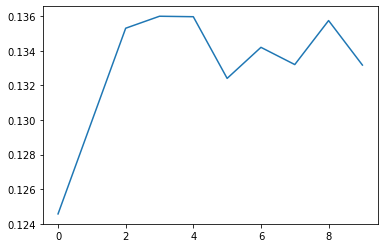

In [214]:
plt.plot(x, y)
plt.show()

In [137]:
# for i in range(len(models[1:])):
#     models[i + 1] = (models[i + 1][0], i + 2, models[i + 1][1])

In [169]:
models

[('without_hidden_layer',
  0,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140a8cac0>),
 ('first_2',
  2,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143b50460>),
 ('first_3',
  3,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143626a90>),
 ('first_4',
  4,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe14060b040>),
 ('first_5',
  5,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140b162b0>),
 ('first_6',
  6,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140b99d60>),
 ('first_7',
  7,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140b429a0>),
 ('first_8',
  8,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1405f1160>),
 ('first_9',
  9,
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140816c40>)]

### Дообучение

In [171]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [175]:
v = 2
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=15, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit without_hidden_layer
Epoch 1/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 2/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 3/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 4/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 5/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 6/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 7/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0218
Epoch 8/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 9/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 10/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 11/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 12/15
300/300 [==============================] - 1s 2ms/step - loss: 0.021

296/296 [==============================] - 1s 2ms/step - loss: 0.0231
Epoch 2/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0225
Epoch 3/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0223
Epoch 4/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0221
Epoch 5/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0220
Epoch 6/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 7/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 8/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 9/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 10/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 11/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 12/15
296/296 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 13/15
296/296 [===============

In [176]:
n = len(df_metrics)

In [187]:
df_metrics.iloc[n // 2:]

,model,layer,N,mean,norm,stat
9,0_2,first,0,0.122896,0.316969,0.340087
10,2_2,first,2,0.128244,0.330215,0.338811
11,3_2,first,3,0.127732,0.329964,0.338334
12,4_2,first,4,0.128266,0.331884,0.338612
13,5_2,first,5,0.128381,0.332443,0.338428
14,6_2,first,6,0.126757,0.327066,0.338695
15,7_2,first,7,0.125833,0.325622,0.338260
16,8_2,first,8,0.128582,0.332637,0.338846
17,9_2,first,9,0.126433,0.327394,0.338770


In [188]:
x = df_metrics.iloc[n // 2:]['N']
y = df_metrics.iloc[n // 2:]['mean']

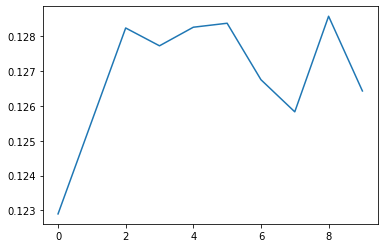

In [190]:
plt.plot(x, y)
plt.show()

### Разработка функции apply_float() для NN.tools модуля

In [71]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [72]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [77]:
apply_float(df, fields)

In [78]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [79]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [80]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [17]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [82]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [84]:
make_valid_df(df, fields)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
